## Introduction

PyTorch code for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

Labels:  tensor([0, 5, 1, 0, 8, 2, 6, 1, 3, 6, 4, 9, 8, 9, 0, 4, 9, 2, 4, 9, 9, 4, 0, 7,
        1, 1, 2, 1, 0, 0, 7, 0, 0, 6, 8, 7, 3, 0, 8, 7, 7, 8, 3, 4, 9, 1, 5, 2,
        2, 9, 7, 3, 9, 4, 3, 7, 9, 0, 1, 0, 3, 6, 0, 4])
Batch shape:  torch.Size([64, 1, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


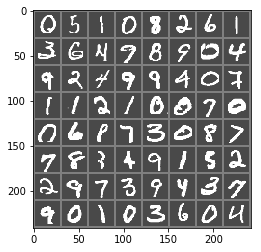

In [3]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
dataiter = iter(train_loader)
images, labels = dataiter.next()

# Display few images for Mnist (Cifar done below)
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    im = im / 2 + 0.5 #To unnormalize
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0))) #plot image
print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

In [4]:
# network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [5]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.392142
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.506408
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.592300
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.359377
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.313032
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.534330
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.470273
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.343106
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.319978
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.305069


c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.3342, Accuracy: 9079/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.203367
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.542646
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.403065
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.387430
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.266478
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.363806
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.404973
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.339428
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.438343
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.404614

Test set: Average loss: 0.3055, Accuracy: 9143/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.279868
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.185030
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.390890
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.269467
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.170843
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.351682
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.506899
Train Epoch: 3 [44800/60000 (75%)]	Loss:

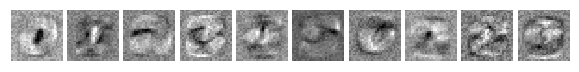

In [6]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()
def plot_kernels(tensor, num_cols=6):
    print("Output layer 1")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        #t = tensor[i] / 2 + 0.5 uncomment for unnormalized
        #ax1.imshow(t[:,:],cmap='gray')
        ax1.imshow(tensor[i][:,:],cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
filters = network.modules();
model_layers = [i for i in network.children()];
first_layer = model_layers;
first_kernels = first_layer[0].weight.data.numpy()
a=np.reshape(first_kernels,(10,28,28))
plot_kernels(a, 10)

In [7]:
# Reduce the number of training examples to just 50.


# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
dataiter = iter(train_loader)
images, labels = dataiter.next()
#Take 50 training samples
train50_loader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=False, num_workers=0)
images, labels = next(iter(train50_loader))

#Create new dataset of 50 traning samples
train50_dataset=torch.utils.data.TensorDataset(images,labels)

#Batch_Size=10
train50_dataset_loader = torch.utils.data.DataLoader(train50_dataset, batch_size=10, shuffle=True, num_workers=0)

In [8]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hidden = 1000
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
        
    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [9]:
def train(epoch):
    network.train()
    #Using 50 samples dataset
    for batch_idx, (data, target) in enumerate(train50_dataset_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 1 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train50_dataset_loader.dataset),
                10. * batch_idx / len(train50_dataset_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Train Epoch: 1 [0/50 (0%)]	Loss: 2.426399
Train Epoch: 1 [10/50 (2%)]	Loss: 2.607249
Train Epoch: 1 [20/50 (4%)]	Loss: 2.382885
Train Epoch: 1 [30/50 (6%)]	Loss: 2.045044
Train Epoch: 1 [40/50 (8%)]	Loss: 1.937595


c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 2.0272, Accuracy: 3484/10000 (34%)

Train Epoch: 2 [0/50 (0%)]	Loss: 1.360051
Train Epoch: 2 [10/50 (2%)]	Loss: 1.493771
Train Epoch: 2 [20/50 (4%)]	Loss: 1.773813
Train Epoch: 2 [30/50 (6%)]	Loss: 1.340459
Train Epoch: 2 [40/50 (8%)]	Loss: 1.760080

Test set: Average loss: 1.7183, Accuracy: 5116/10000 (51%)

Train Epoch: 3 [0/50 (0%)]	Loss: 1.189686
Train Epoch: 3 [10/50 (2%)]	Loss: 1.123323
Train Epoch: 3 [20/50 (4%)]	Loss: 1.081593
Train Epoch: 3 [30/50 (6%)]	Loss: 0.944197
Train Epoch: 3 [40/50 (8%)]	Loss: 1.229251

Test set: Average loss: 1.5554, Accuracy: 5580/10000 (55%)

Train Epoch: 4 [0/50 (0%)]	Loss: 0.912043
Train Epoch: 4 [10/50 (2%)]	Loss: 0.762199
Train Epoch: 4 [20/50 (4%)]	Loss: 1.137611
Train Epoch: 4 [30/50 (6%)]	Loss: 0.858375
Train Epoch: 4 [40/50 (8%)]	Loss: 0.716217

Test set: Average loss: 1.4426, Accuracy: 5874/10000 (58%)

Train Epoch: 5 [0/50 (0%)]	Loss: 0.715023
Train Epoch: 5 [10/50 (2%)]	Loss: 0.538800
Train Epoch: 5 [20/50 (4%)]	L

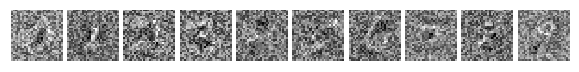

In [10]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()
def plot_kernels(tensor, num_cols=6):
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        #t = tensor[i] / 2 + 0.5              #Uncomment for unnormalized images
        #ax1.imshow(t[:,:],cmap='gray') 
        ax1.imshow(tensor[i][:,:],cmap='gray') #Comment for unnormalized images
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

filters = network.modules();
model_layers = [i for i in network.children()];
first_layer = model_layers;
first_kernels = first_layer[0].weight.data.numpy()
a=np.reshape(first_kernels,(10,28,28))
plot_kernels(a, 10)

In [11]:
# Add an extra layer to the network with 1000 hidden units and a tanh non-linearity. [Hint: modify the Net class]. Train the model for 10 epochs and save the output into your report.

# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [12]:
# network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hidden = 1000
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hidden):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_hidden)
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        out = torch.tanh(self.linear(input))
        output = self.linear2(out)
        return output

network = Net(num_inputs, num_outputs, num_hidden)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [13]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                10. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [14]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305004
Train Epoch: 1 [6400/60000 (1%)]	Loss: 0.859946
Train Epoch: 1 [12800/60000 (2%)]	Loss: 0.628621
Train Epoch: 1 [19200/60000 (3%)]	Loss: 0.479175
Train Epoch: 1 [25600/60000 (4%)]	Loss: 0.458637
Train Epoch: 1 [32000/60000 (5%)]	Loss: 0.371273
Train Epoch: 1 [38400/60000 (6%)]	Loss: 0.456905
Train Epoch: 1 [44800/60000 (7%)]	Loss: 0.324400
Train Epoch: 1 [51200/60000 (9%)]	Loss: 0.296349
Train Epoch: 1 [57600/60000 (10%)]	Loss: 0.350984


c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.3237, Accuracy: 9104/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.373155
Train Epoch: 2 [6400/60000 (1%)]	Loss: 0.305984
Train Epoch: 2 [12800/60000 (2%)]	Loss: 0.392420
Train Epoch: 2 [19200/60000 (3%)]	Loss: 0.399534
Train Epoch: 2 [25600/60000 (4%)]	Loss: 0.224433
Train Epoch: 2 [32000/60000 (5%)]	Loss: 0.179215
Train Epoch: 2 [38400/60000 (6%)]	Loss: 0.255553
Train Epoch: 2 [44800/60000 (7%)]	Loss: 0.367440
Train Epoch: 2 [51200/60000 (9%)]	Loss: 0.233735
Train Epoch: 2 [57600/60000 (10%)]	Loss: 0.259775

Test set: Average loss: 0.2836, Accuracy: 9201/10000 (92%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.206979
Train Epoch: 3 [6400/60000 (1%)]	Loss: 0.396366
Train Epoch: 3 [12800/60000 (2%)]	Loss: 0.301343
Train Epoch: 3 [19200/60000 (3%)]	Loss: 0.209017
Train Epoch: 3 [25600/60000 (4%)]	Loss: 0.321175
Train Epoch: 3 [32000/60000 (5%)]	Loss: 0.400188
Train Epoch: 3 [38400/60000 (6%)]	Loss: 0.162085
Train Epoch: 3 [44800/60000 (7%)]	Loss: 0.307389
Train

In [15]:
# Change Learning rate to 10

# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 10        # learning rate

In [16]:
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
dataiter = iter(train_loader)
images, labels = dataiter.next()
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [17]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hidden = 1000
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hidden):
        super(Net, self).__init__()
        
        #Add hidden layer
        self.linear = nn.Linear(num_inputs, num_hidden)
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        
        #Add tanh non-linearity
        out = torch.tanh(self.linear(input))
        output = self.linear2(out)
        return output

network = Net(num_inputs, num_outputs, num_hidden)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [18]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                10. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [19]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314696
Train Epoch: 1 [6400/60000 (1%)]	Loss: 1685.940796
Train Epoch: 1 [12800/60000 (2%)]	Loss: 556.318542
Train Epoch: 1 [19200/60000 (3%)]	Loss: 261.875519
Train Epoch: 1 [25600/60000 (4%)]	Loss: 714.687317
Train Epoch: 1 [32000/60000 (5%)]	Loss: 872.423035
Train Epoch: 1 [38400/60000 (6%)]	Loss: 549.678406
Train Epoch: 1 [44800/60000 (7%)]	Loss: 836.665527
Train Epoch: 1 [51200/60000 (9%)]	Loss: 510.578308
Train Epoch: 1 [57600/60000 (10%)]	Loss: 135.631317


c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 340.5049, Accuracy: 5729/10000 (57%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 259.223389
Train Epoch: 2 [6400/60000 (1%)]	Loss: 492.429932
Train Epoch: 2 [12800/60000 (2%)]	Loss: 330.615997
Train Epoch: 2 [19200/60000 (3%)]	Loss: 219.232117
Train Epoch: 2 [25600/60000 (4%)]	Loss: 269.507446
Train Epoch: 2 [32000/60000 (5%)]	Loss: 256.043121
Train Epoch: 2 [38400/60000 (6%)]	Loss: 128.083405
Train Epoch: 2 [44800/60000 (7%)]	Loss: 198.986069
Train Epoch: 2 [51200/60000 (9%)]	Loss: 246.312973
Train Epoch: 2 [57600/60000 (10%)]	Loss: 131.664810

Test set: Average loss: 867.7570, Accuracy: 4348/10000 (43%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 964.102783
Train Epoch: 3 [6400/60000 (1%)]	Loss: 458.340851
Train Epoch: 3 [12800/60000 (2%)]	Loss: 216.064926
Train Epoch: 3 [19200/60000 (3%)]	Loss: 470.886475
Train Epoch: 3 [25600/60000 (4%)]	Loss: 211.443878
Train Epoch: 3 [32000/60000 (5%)]	Loss: 564.890015
Train Epoch: 3 [38400/60000 (6%)]	Loss: 180.389038
Train Epoch: 3 [

In [20]:
# Training on Cifar10

# options
dataset = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 20       # number of epochs to train 20
lr = 0.01        # learning rate

Files already downloaded and verified
Labels:  tensor([6, 1, 6, 2, 3, 5, 9, 4, 4, 6, 6, 0, 2, 9, 8, 6, 8, 6, 1, 8, 5, 2, 0, 9,
        4, 9, 4, 4, 2, 4, 2, 2, 8, 4, 9, 1, 5, 5, 9, 4, 8, 7, 0, 6, 3, 3, 3, 3,
        0, 0, 9, 0, 9, 5, 1, 1, 3, 4, 2, 3, 6, 0, 9, 1])
Batch shape:  torch.Size([64, 3, 32, 32])


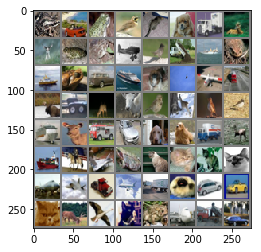

In [21]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    #trainset=trainset[:50]
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

dataiter = iter(trainloader)
images, labels = dataiter.next()

#Display some cifar images
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    im = im / 2 + 0.5 #To unnormalize (Comment to show normalized image)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [22]:
dataset == 'cifar10'
num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
class Net(nn.Module):
    def __init__(self,num_inputs, num_outputs):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 128, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(2))
        self.linear = nn.Sequential(
            nn.Linear(128*5*5,64),
            nn.Tanh())
        self.linear2 = nn.Linear(64,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        #out = out.view(-1, self.num_flat_features(out))
        out = out.view(out.size(0), -1)
        out=  self.linear(out)
        out=  self.linear2(out)
        return out
        
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [23]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/50000 (0%)]	Loss: 0.733467
Train Epoch: 1 [6400/50000 (13%)]	Loss: 0.856753
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.954359
Train Epoch: 1 [19200/50000 (38%)]	Loss: 0.839024
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.663379
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.786437
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.838229
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.920574


c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\users\budhk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.9552, Accuracy: 6677/10000 (66%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.620655
Train Epoch: 2 [6400/50000 (13%)]	Loss: 0.861517
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.682064
Train Epoch: 2 [19200/50000 (38%)]	Loss: 0.659741
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.008145
Train Epoch: 2 [32000/50000 (64%)]	Loss: 0.924013
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.893767
Train Epoch: 2 [44800/50000 (90%)]	Loss: 0.676773

Test set: Average loss: 1.0031, Accuracy: 6484/10000 (64%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.909753
Train Epoch: 3 [6400/50000 (13%)]	Loss: 0.780487
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.624220
Train Epoch: 3 [19200/50000 (38%)]	Loss: 0.714851
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.758936
Train Epoch: 3 [32000/50000 (64%)]	Loss: 0.649789
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.972828
Train Epoch: 3 [44800/50000 (90%)]	Loss: 0.574592

Test set: Average loss: 0.9612, Accuracy: 6654/10000 (66%)

Train Epoch: 4 [0/50000 (0%)]

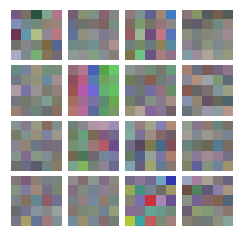

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

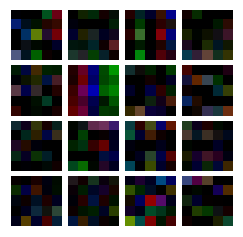

In [26]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

# Unnormalized plot
def plot_kernels(tensor, num_cols=4):
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        t = tensor[i] / 2 + 0.5 #Unnormalize
        im2display = np.reshape(t,(5,5,3))
        ax1.imshow(im2display)
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

filters = network.modules();
model_layers = [i for i in network.children()];
first_layer = model_layers[0];
first_kernels = first_layer[0].weight.data.numpy()
a=first_kernels
plot_kernels(a,4)

# Normalized plot
def plot_kernels(tensor, num_cols=4):
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        im2display = np.reshape(tensor[i],(5,5,3))
        ax1.imshow(im2display)
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

filters = network.modules();
model_layers = [i for i in network.children()];
first_layer = model_layers[0];
first_kernels = first_layer[0].weight.data.numpy()
a=first_kernels
plot_kernels(a,4)

In [24]:
params = list(network.parameters())
print("Parameter Breakdown")
for i in range(len(params)):
    print(params[i].size())
print("Total parameters: ((3x5x5x16+16)+(16x5x5x128+128)+(5x5x128x64+64)+64x10) = 258048")


Parameter Breakdown
torch.Size([16, 3, 5, 5])
torch.Size([16])
torch.Size([128, 16, 5, 5])
torch.Size([128])
torch.Size([64, 3200])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])
Total parameters: ((3x5x5x16+16)+(16x5x5x128+128)+(5x5x128x64+64)+64x10) = 258048
